Loan Eligibility Prediction: A Machine Learning Approach

This dataset we used is an invaluable resource for developing a machine learning model aimed at predicting loan eligibility. It comprises various applicant details typically considered by financial institutions during the loan approval process. Key features include:

Applicant Demographics: Gender, Marital Status, Education, Number of Dependents.
Financial Information: Applicant's Income, Coapplicant's Income.
Loan Details: Loan Amount, Loan Term.
Credit History: Applicant’s past credit history and related details.
Property Area: Classification of the applicant's residential area (urban, rural, semi-urban).
The target variable is the Loan Status, indicating whether a loan was approved or not. This dataset is particularly useful for understanding the factors that influence loan approval decisions and can be utilized to train models that could assist financial institutions in automating the loan eligibility process, thus increasing efficiency and reducing bias in decision-making.


Loan_ID: A unique identifier for each loan application.
Gender: The gender of the applicant.
Married: Marital status of the applicant.
Dependents: Number of dependents.
Education: Applicant's education level.
Self_Employed: Whether the applicant is self-employed or not.
ApplicantIncome: Income of the applicant.
CoapplicantIncome: Income of the co-applicant.
LoanAmount: Loan amount in thousands.
Loan_Amount_Term: Term of the loan in months.
Credit_History: Credit history as per the guidelines.
Property_Area: Urban/ Semi-Urban/ Rural.
Loan_Status: Loan approved (Y/N).

Now, we will proceed from the first step that starting from importing dataset to data cleaning.


In [5]:
import pandas as pd

# Loading the datasets
train_data_path = r"C:\Users\DELL\Downloads\train_u6lujuX_CVtuZ9i.csv"
test_data_path = r"C:\Users\DELL\Downloads\test_Y3wMUE5_7gLdaTN.csv"

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the train data
train_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


in step 2 we started with Handled Missing Values, then as follows:

Filled missing values in numerical columns with their median.
Filled missing values in categorical columns with the most frequent value.
Label Encoding:

Converted categorical variables into numerical form, except for 'Loan_ID' which isn't needed for the model.
Splitting the Dataset:

Separated the features (X) and the target variable (y, which is 'Loan_Status').
Split the data into training and validation sets.
Data Overview after Processing:
The training set (X_train) and the target variable (y_train) are ready for model training.
X_train contains features like Gender, Married, Dependents, Education, etc.
y_train is the Loan Status, now encoded as 0s and 1s (where 1 likely represents loan approval).

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np


# Handling missing values
# For numerical columns, we'll fill missing values with the median of that column
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
imputer_num = SimpleImputer(strategy='median')
train_data[numerical_cols] = imputer_num.fit_transform(train_data[numerical_cols])

# For categorical columns, we'll fill missing values with the most frequent value (mode)
categorical_cols = train_data.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = imputer_cat.fit_transform(train_data[categorical_cols])

# Convert categorical variables into numerical form using Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    if col != 'Loan_ID': # We don't need to encode the Loan ID
        train_data[col] = label_encoder.fit_transform(train_data[col])

# Splitting the dataset into features (X) and target variable (y)
X = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_data['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head(), y_train.head()


(     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
 90        1        1           0          0              0           2958.0   
 533       1        0           1          0              0          11250.0   
 452       1        1           0          0              0           3948.0   
 355       0        0           0          0              0           3813.0   
 266       1        1           2          0              0           4708.0   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 90              2900.0       131.0             360.0             1.0   
 533                0.0       196.0             360.0             1.0   
 452             1733.0       149.0             360.0             0.0   
 355                0.0       116.0             180.0             1.0   
 266             1387.0       150.0             360.0             1.0   
 
      Property_Area  
 90               1  
 533              1  
 452        

in step 3 will figure out how well regresssion model gets train and evaluated.

Build and Train the Model: We will use a Logistic Regression model, as it's suitable for binary classification problems.
Model Evaluation: After training, we'll evaluate the model using the validation set to see how well it performs.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Building the Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=0)

# Training the Model
model.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = model.predict(X_val)

# Model Evaluation
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

accuracy, report


(0.8373983739837398,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.45      0.60        33\n           1       0.83      0.98      0.90        90\n\n    accuracy                           0.84       123\n   macro avg       0.86      0.72      0.75       123\nweighted avg       0.84      0.84      0.82       123\n')

step 4:
Improving the Model: Consider experimenting with different models or tuning the hyperparameters of the current model to improve performance, especially the recall for class 0.
Feature Importance Analysis: Investigate which features are most influential in predicting the loan status.
Cross-Validation: Implement cross-validation to ensure the model's robustness and to avoid overfitting.

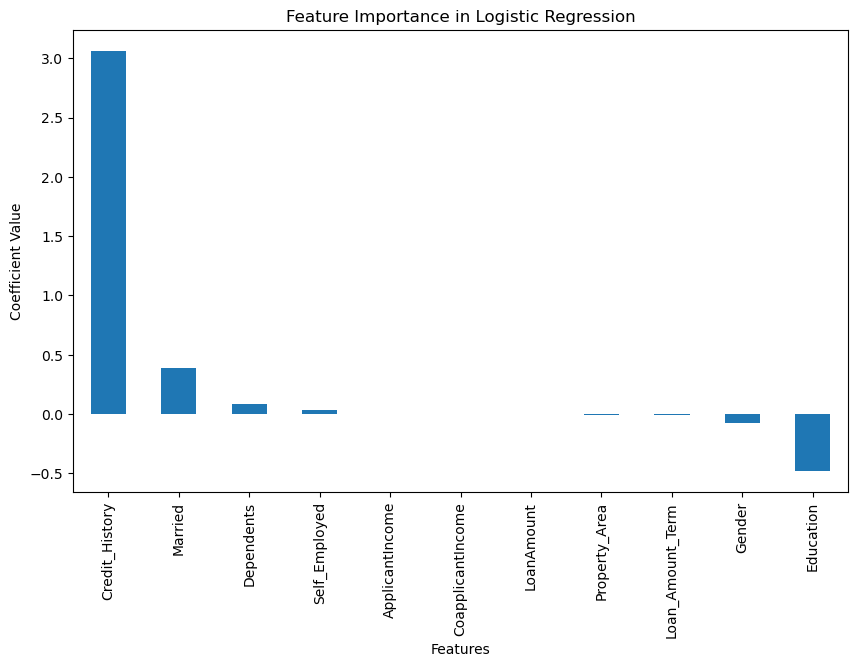

,importance
Credit_History,3.060386
Married,0.391765
Dependents,0.082187
Self_Employed,0.036814
ApplicantIncome,0.000007
CoapplicantIncome,-0.000069
LoanAmount,-0.002037
Property_Area,-0.004224
Loan_Amount_Term,-0.004982
Gender,-0.074424


In [12]:
import matplotlib.pyplot as plt

# Extracting the coefficients
feature_importance = pd.DataFrame(model.coef_[0], 
                                  index=X_train.columns, 
                                  columns=['importance']).sort_values('importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
feature_importance['importance'].plot(kind='bar')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

feature_importance


in step 5 will perfomr hyperparameter tuning to best score(accuracy)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Setting up the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'tol': [0.01, 0.001, 0.0001]  # Adjusting tolerance
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy', verbose=1)

# Running the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'C': 0.001, 'solver': 'liblinear', 'tol': 0.01}
Best Score: 0.8044320758606472


in step 6 we had Rebuild the Model with Optimal Parameters: and will now rebuild the Logistic Regression model using these optimal parameters and retrain it on the entire training dataset.

Cross-Validation: To validate the model's performance more robustly, we'll conduct cross-validation on the entire dataset.

 Finally, we'll evaluate the model on the validation set again to see if there's an improvement in performance.

In [19]:
# Rebuilding the model with optimal parameters
optimized_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=1000, random_state=0)

# Retraining the model on the entire training dataset
optimized_model.fit(X_train, y_train)

# Making predictions on the validation set with the optimized model
optimized_y_pred = optimized_model.predict(X_val)

# Evaluating the optimized model
optimized_accuracy = accuracy_score(y_val, optimized_y_pred)
optimized_report = classification_report(y_val, optimized_y_pred)

optimized_accuracy, optimized_report


(0.7398373983739838,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.03      0.06        33\n           1       0.74      1.00      0.85        90\n\n    accuracy                           0.74       123\n   macro avg       0.87      0.52      0.45       123\nweighted avg       0.81      0.74      0.64       123\n')

In [21]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation on the entire dataset
cv_scores = cross_val_score(optimized_model, X, y, cv=5, scoring='accuracy')

# Calculating the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std, cv_scores


(0.6872984139677463,
 0.0036872105184800976,
 array([0.69105691, 0.69105691, 0.68292683, 0.68292683, 0.68852459]))

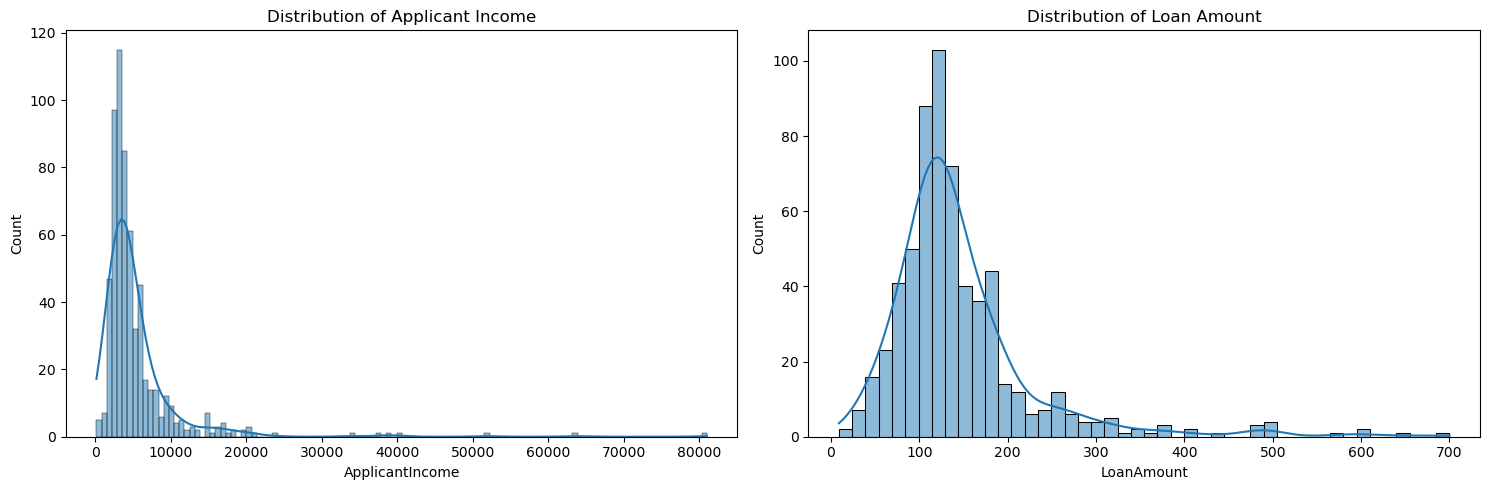

C:\Users\DELL\AppData\Local\Temp\ipykernel_19372\2568924896.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')


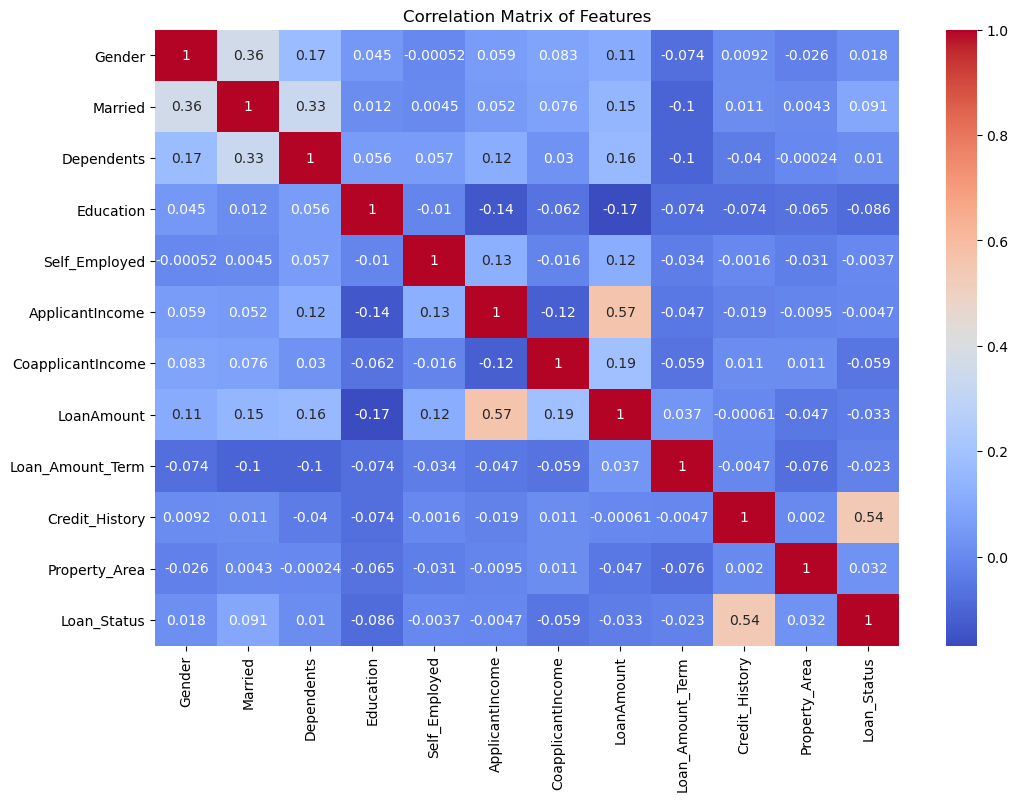

In [23]:
import seaborn as sns

# Data Distribution Plots for key features
plt.figure(figsize=(15, 5))

# Applicant Income
plt.subplot(1, 2, 1)
sns.histplot(train_data['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')

# Loan Amount
plt.subplot(1, 2, 2)
sns.histplot(train_data['LoanAmount'], kde=True)
plt.title('Distribution of Loan Amount')

plt.tight_layout()
plt.show()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


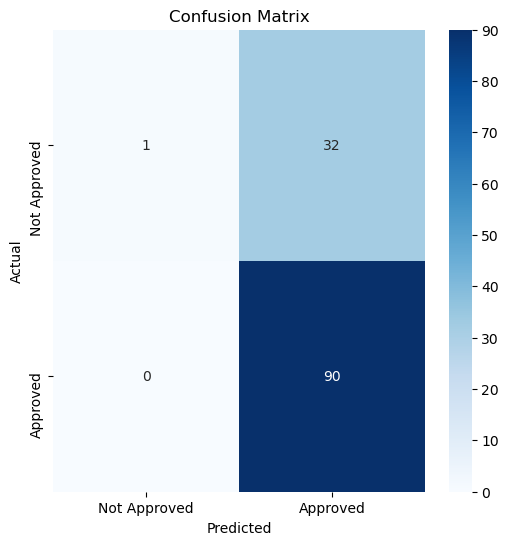

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


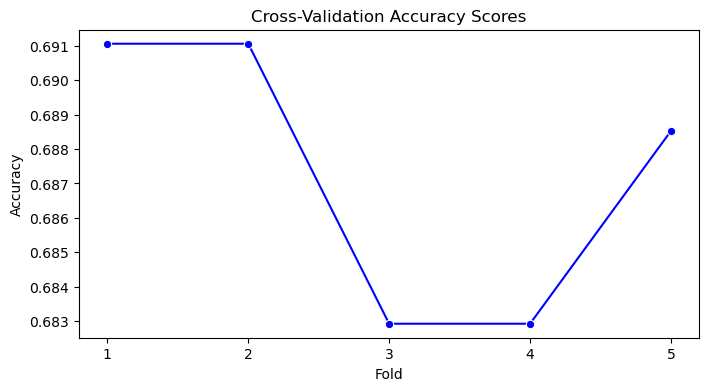

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix for the Model's Predictions
cm = confusion_matrix(y_val, optimized_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Cross-Validation Scores Plot
plt.figure(figsize=(8, 4))
sns.lineplot(range(1, 6), cv_scores, marker='o', color='blue')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.show()


Confusion Matrix:

This matrix provides a detailed view of the model's predictions compared to the actual values. It shows the number of true positives, true negatives, false positives, and false negatives.
Such a matrix is crucial for understanding the model's performance, especially in distinguishing between different classes (in this case, 'Loan Approved' and 'Not Approved').

Cross-Validation Accuracy Scores:
This plot shows the accuracy scores for each fold in the cross-validation process.
